<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 · Tipología y ciclo de vida de los datos</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


<div class="row" style="background: #FCB517;padding: 10px 20px;">
    <div class="col-md-6">
        <div style="text-align:center;"> </div>
    </div>
</div>


<div class="container-fluid main-container">
    <div class="fluid-row" id="header">
        <hr />
        <hr />
        <hr />
            <h1 class="title toc-ignore">Práctica 2: ¿Cómo realizar la limpieza y análisis de datos?</h1>
            <h4 class="author">Agustin Rovira Quezada & Adrian Vega Morales</h4>
        <hr />
        <hr />
        <hr />
    </div>

<div id="TOC">
<ul>
<li><a href="#introducción"><span class="toc-section-number">1</span> Descripción del dataset</a></li>
<li><a href="#enunciado"><span class="toc-section-number">2</span> Integración y selección</a></li>
<li><a href="#ejercicios"><span class="toc-section-number">3</span> Limpieza de los datos</a><ul>
<li><a href="#ejercicio-1"><span class="toc-section-number">3.1</span> Gestiona elementos nulos</a></li>
<li><a href="#ejercicio-2"><span class="toc-section-number">3.1</span> Gestiona outliers</a></li>
</ul></li>
<li><a href="#rúbrica"><span class="toc-section-number">4</span> Análisis de los datos</a><ul>
<li><a href="#ejercicio-41"><span class="toc-section-number">4.1</span> Seleccion de Grupos</a></li>
<li><a href="#ejercicio-42"><span class="toc-section-number">4.2</span> Comprobar Normalidad</a></li>
<li><a href="#ejercicio-43"><span class="toc-section-number">4.3</span> Pruebas Estadisticas</a></li>
</ul></li>
<li><a href="#ejercicio-5"><span class="toc-section-number">5</span> Representación de los resultados</a></li>
<li><a href="#ejercicio-6"><span class="toc-section-number">6</span> Resolución del problema</a></li>
</ul>
</div>
</div>

In [1]:
import pandas as pd
import os
import re
import io
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample
import statsmodels.api as sm
from scipy import stats
import numpy as np
import scipy.stats as ss
import pingouin as pg
from scipy.stats import bartlett
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import cluster
import plotly.graph_objects as go

<div id="introducción" class="section level1">
<h1><span class="header-section-number">1.</span> Descripción del dataset</h1>
<hr />
¿Por qué es importante y qué pregunta/problema pretende responder?
<hr />
</div>

In [2]:
df=pd.read_csv("US_Accidents_dataset.csv")
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


Reducir los accidentes de trafico es un gran desafío para la seguridad pública en todo el mundo. En concreto en Estados Unidos donde se ha visto una enorme cantidad de accidentes diarios en los ultimos 5 años. Asi lo demuestra el total de 2 millones de accidentes recogidos en el dataset de Kaggle US Accidents (2016 - 2021)[1]. 

Este es un conjunto de datos de accidentes automovilísticos de todo el país, que cubre 50 estados de los EE. UU. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes (o eventos) de tráfico. Estas API transmiten datos de tráfico capturados por una variedad de entidades, como los departamentos de transporte estatales y de EE. UU., agencias de aplicación de la ley, cámaras de tráfico y sensores de tráfico dentro de las redes de carreteras.

Con la informacion de este dataset buscamos realizar un analisis exploratorio con la finalidad de identificar los factores que tengan influencia sobre la severidad de los accidentes. Por otro, es tambien se quiere encontrar los focos de concentracion de accidentes con la finalidad de posibilitar a las autoridades competentes la toma de decisiones necesarias en los puntos geograficos estratégicos para reducir el numero de accidentes o al menos la severidad de estos.


[1]https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

<module 'matplotlib.pyplot' from 'C:\\Users\\agust\\.conda\\envs\\Proyects\\lib\\site-packages\\matplotlib\\pyplot.py'>

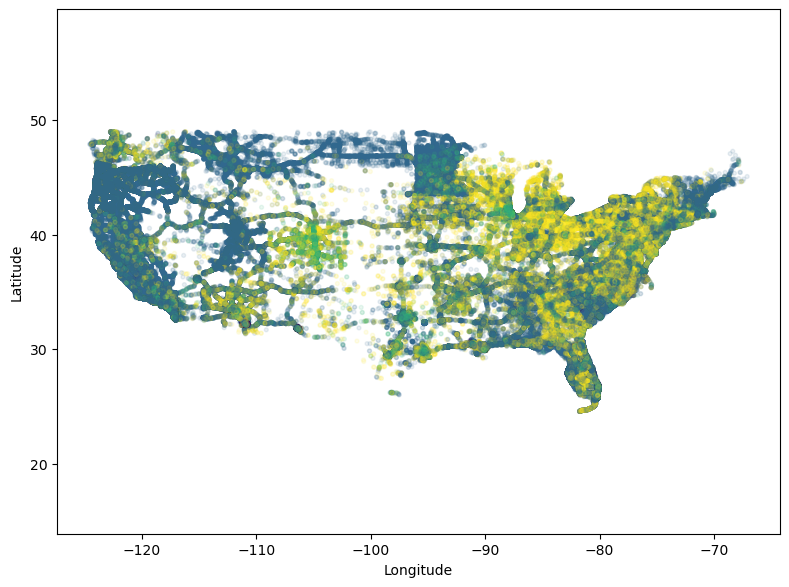

In [3]:
def plot_accidents(dataset):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.scatter(dataset['Start_Lng'], dataset['Start_Lat'], s=8, alpha=.1,c=dataset["Severity"])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.axis('equal')
    plt.tight_layout()
    return plt

plot_accidents(df)

<div id="enunciado" class="section level1">
<h1><span class="header-section-number">2.</span> Integración y selección</h1>
<hr />
</div>

Tras una primera exploracion descriptiva y una lectura comprensiva del significado de cada variable, podemos ver que es posible
seleccionar un subconjunto de variables con el que trabajar. 

In [4]:
buf = io.StringIO()
df.info(buf=buf)
s = buf.getvalue()
lines = [line.split() for line in s.splitlines()[6:-2]]
info=pd.DataFrame(lines,columns=["d","Variable","Tipo"]).drop("d", axis=1)
info

,Variable,Tipo
0,Severity,int64
1,Start_Time,object
2,End_Time,object
3,Start_Lat,float64
4,Start_Lng,float64
5,End_Lat,float64
6,End_Lng,float64
7,Distance(mi),float64
8,Description,object
9,Number,float64


In [5]:
df.shape

(2845342, 47)

##### Columns tipo Bool
Empezando con las variables tipo bolean podemos ver que las 13 variables no estan balanceadas, todas tienen mas de un 98% de frecuencia para el valor "False". Por lo tanto estas variables pueden ser eliminadas ya que no aportan informacion relevante.

Como se aplicamos una subseleccion con .iloc

In [6]:
#Variable Bool
describe=df.describe(include="bool").T
describe["freq"]=describe["freq"].apply(lambda x: round(100*(x/df.shape[0])))
describe

,count,unique,top,freq
Amenity,2845342,2,False,99
Bump,2845342,2,False,100
Crossing,2845342,2,False,93
Give_Way,2845342,2,False,100
Junction,2845342,2,False,90
No_Exit,2845342,2,False,100
Railway,2845342,2,False,99
Roundabout,2845342,2,False,100
Station,2845342,2,False,98
Stop,2845342,2,False,98


In [7]:
#Eliminacion
bool_idx=[x for x in df.dtypes!="bool"]
df=df.iloc[:, bool_idx]

##### Columns tipo Object

Se observa que muchas de las columnas de este tipo estan desbalanceadas, tiene un 70% de frecuencia para una de los factores. Por lo tanto los eliminaremos las columnas ['Country', 'Astronomical_Twilight', 'Civil_Twilight', 'Sunrise_Sunset', 'Nautical_Twilight', 'Side']


Por otro lado, hay otras columnas que carecen de significado para el analisis que se va a realizar por lo cual tambien se eliminaran. Estas son las siguientes [Timezone,ID,Description,County]

In [8]:
#Variable object
describe=df.describe(include="object").T.sort_values(by=["unique"])
describe

,count,unique,top,freq
Country,2845342,1,US,2845342
Astronomical_Twilight,2842475,2,Day,2176983
Civil_Twilight,2842475,2,Day,1929103
Sunrise_Sunset,2842475,2,Day,1811935
Nautical_Twilight,2842475,2,Day,2063472
Side,2845342,3,R,2353309
Timezone,2841683,4,US/Eastern,1221927
Wind_Direction,2771567,24,CALM,433622
State,2845342,49,CA,795868
Weather_Condition,2774706,127,Fair,1107194


In [9]:
Object_drop=describe.loc[describe["unique"]<=3,["freq"]].apply(lambda x: 100*(x/df.shape[0])).index.tolist()
df.drop(Object_drop,inplace=True,axis=1)

toDrop=["Timezone","ID","Description","County"]
df.drop(toDrop,inplace=True,axis=1)

##### Coulmns tipo numeric
De las columnas tipo numericas solo tenemos que eliminar Number ya que pose mas de un 90% de NANs


In [10]:
#Variable numericas
describe=df.describe().T
describe["count"]=describe["count"].apply(lambda x: round(100*(x/df.shape[0])))
describe

,count,mean,std,min,25%,50%,75%,max
Severity,100,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,100,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,100,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,100,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,100,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),100,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,39,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),98,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),83,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),97,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [11]:
df.drop(["Number"],inplace=True,axis=1)

##### Transformacion de columnas

In [12]:
df['Month'] = pd.to_datetime(df["Weather_Timestamp"]).apply(lambda x: dt.datetime.date(x).month)
df['Time'] = pd.to_datetime(df["Weather_Timestamp"]).apply(lambda x: dt.datetime.time(x).hour)
df['Year'] = pd.to_datetime(df["Weather_Timestamp"]).apply(lambda x: dt.datetime.date(x).year)
df['Duration'] =  pd.to_datetime(df['End_Time'])-pd.to_datetime(df['Start_Time'])
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds()/60) )
df.drop(["Weather_Timestamp","End_Time","Start_Time"],axis=1,inplace=True)

def mappers(df):
    horas=[list(range(x-6,x)) for x in  range(6,30,6)]
    rangos=["0-5","6-11","12-17","18-23"]
    mapTime = {j:i  for e,i in zip(horas,rangos) for j in e}
    df['Time']=df['Time'].map(mapTime)
    
    mapMonth={m:calendar.month_name[m] for m in range(1,13)}
    df['Month']=df['Month'].map(mapMonth)
    
    mapWind={'SW':"SW", 'WSW':"W", 'West':"W", 'NNW':"N", 'WNW':'W', 'NW':'NW', 'W':'W', 'SSW':"S", 'East':"E", 'SE':'SE',
    'North':"N", 'ENE':'E', 'NNE':"N", 'NE':'NE', 'SSE':"S", 'CALM':"C", 'South':"S", 'ESE':"E", 'S':'S',
    'Variable':"V", 'VAR':"V", 'N':"N", 'E':"E"}
    df['Wind_Direction']=df['Wind_Direction'].map(mapWind)
    
    return df

df=mappers(df)

Como resultado nos quedaremos con 21 columnas de 47.  

['Severity','Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Street', 'State', 'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',"Duration","Year","Time"]

<div id="ejercicios" class="section level1">
<h1><span class="header-section-number">3.</span> Limpieza de los datos</h1>
<hr />
</div>

<div id="ejercicio-1" class="section level2">
<h2><span class="header-section-number">3.1</span> ¿Los datos contienen ceros o elementos vacíos? Gestiona cada uno de estos casos</h2>
<hr />
</div>

In [13]:
Nan_Columns=pd.DataFrame(df.isna().sum().sort_values(ascending=False),columns=["NANs"])
Nan_Columns=Nan_Columns.loc[Nan_Columns["NANs"]!=0,["NANs"]]
Nan_Columns["Porcentage"]=  round(100*(Nan_Columns["NANs"]/df.shape[0]))
NanList=Nan_Columns.index.tolist()
Nan_Columns

,NANs,Porcentage
Precipitation(in),549458,19.0
Wind_Chill(F),469643,17.0
Wind_Speed(mph),157944,6.0
Wind_Direction,150309,5.0
Humidity(%),73092,3.0
Weather_Condition,70636,2.0
Visibility(mi),70546,2.0
Temperature(F),69274,2.0
Pressure(in),59200,2.0
Airport_Code,9549,0.0


Se observo en el bloque anterior que habia missing values en el aiport_code y aunque es una de las columnas a eliminar porque no son necesarias para el analisis posterior si que la vamos a usar para eliminar registros de condiciones climatologicas como Precipitation. Esto se decidio asi ya que si no hay registro de condiciones meteorologicas para un accidente no podemos usarlos para el analisis de agrupacion o regresion.

Por otro lado las variables Precipitation(in) y Wind_Chill(F) tiene un porcentage de NaNs de casi un 20%, un valor muy alto para una inputacion. Por lo cual optaremos por eliminar esas filas. 

In [14]:
def CountNans(df):
    Nan_Columns=pd.DataFrame(df.isna().sum().sort_values(ascending=False),columns=["NANs"])
    Nan_Columns=Nan_Columns.loc[Nan_Columns["NANs"]!=0,["NANs"]]
    Nan_Columns["Porcentage"]=  100*(Nan_Columns["NANs"]/df.shape[0])
    NanList=Nan_Columns.index.tolist()
    print(Nan_Columns)
    
    return NanList

In [15]:
df=df.dropna(subset=['Airport_Code',"Precipitation(in)","Wind_Chill(F)","City"])
NanList=CountNans(df)

                   NANs  Porcentage
Visibility(mi)     6739    0.302797
Weather_Condition  6531    0.293451
Humidity(%)        3201    0.143827
Pressure(in)       1445    0.064927
Wind_Direction       14    0.000629
Street                1    0.000045


Vamos a imputar los valores con una media una ventana movil en un rango de una hora. Para dicha imputacion se tendra que cargar el dataset otra vez y clasificar los valores por estado y horas. Esto se hara para Visibility(mi), Weather_Condition, Humidity(%), Pressure(in)

In [16]:
toImp=["Visibility(mi)", "Humidity(%)", "Pressure(in)"]
for i in toImp:
    df[i] = df.groupby(["City","Month","Time"])[i].transform(lambda x:x.fillna(x.mean()))

In [17]:
NanList=CountNans(df)

                   NANs  Porcentage
Weather_Condition  6531    0.293451
Visibility(mi)     1097    0.049290
Humidity(%)         259    0.011637
Pressure(in)        130    0.005841
Wind_Direction       14    0.000629
Street                1    0.000045


Tras la imputacion vemos que no hay demasiados valores con NaNs y que representan un valor insingnificante de porcentage. Por lo cual procedemos simplemente a eliminar esas filas

In [18]:
df=df.dropna(subset=['Visibility(mi)',"Humidity(%)","Pressure(in)","Wind_Direction","Weather_Condition","Wind_Direction"])

<div id="ejercicio-2" class="section level2">
<h2><span class="header-section-number">3.2</span> Identifica y gestiona los valores extremos</h2>
<hr />
</div>

Visualizamos como se distribuyen los factores de severity a lo largo del dataset. Como se vera en el plot la clase no esta balanceada. 

Los valores atípicos en los datos categóricos también pueden atribuirse al problema del desequilibrio de clases. Esto significa que los datos para cada clase no están en una proporción similar. En tal situación, utilizaremos tecnicas de muestreo, concretamente Muestra aleatoria simple con sustitución

In [19]:
df.Severity.value_counts()

2    2066877
3      64824
4      62733
1      23581
Name: Severity, dtype: int64

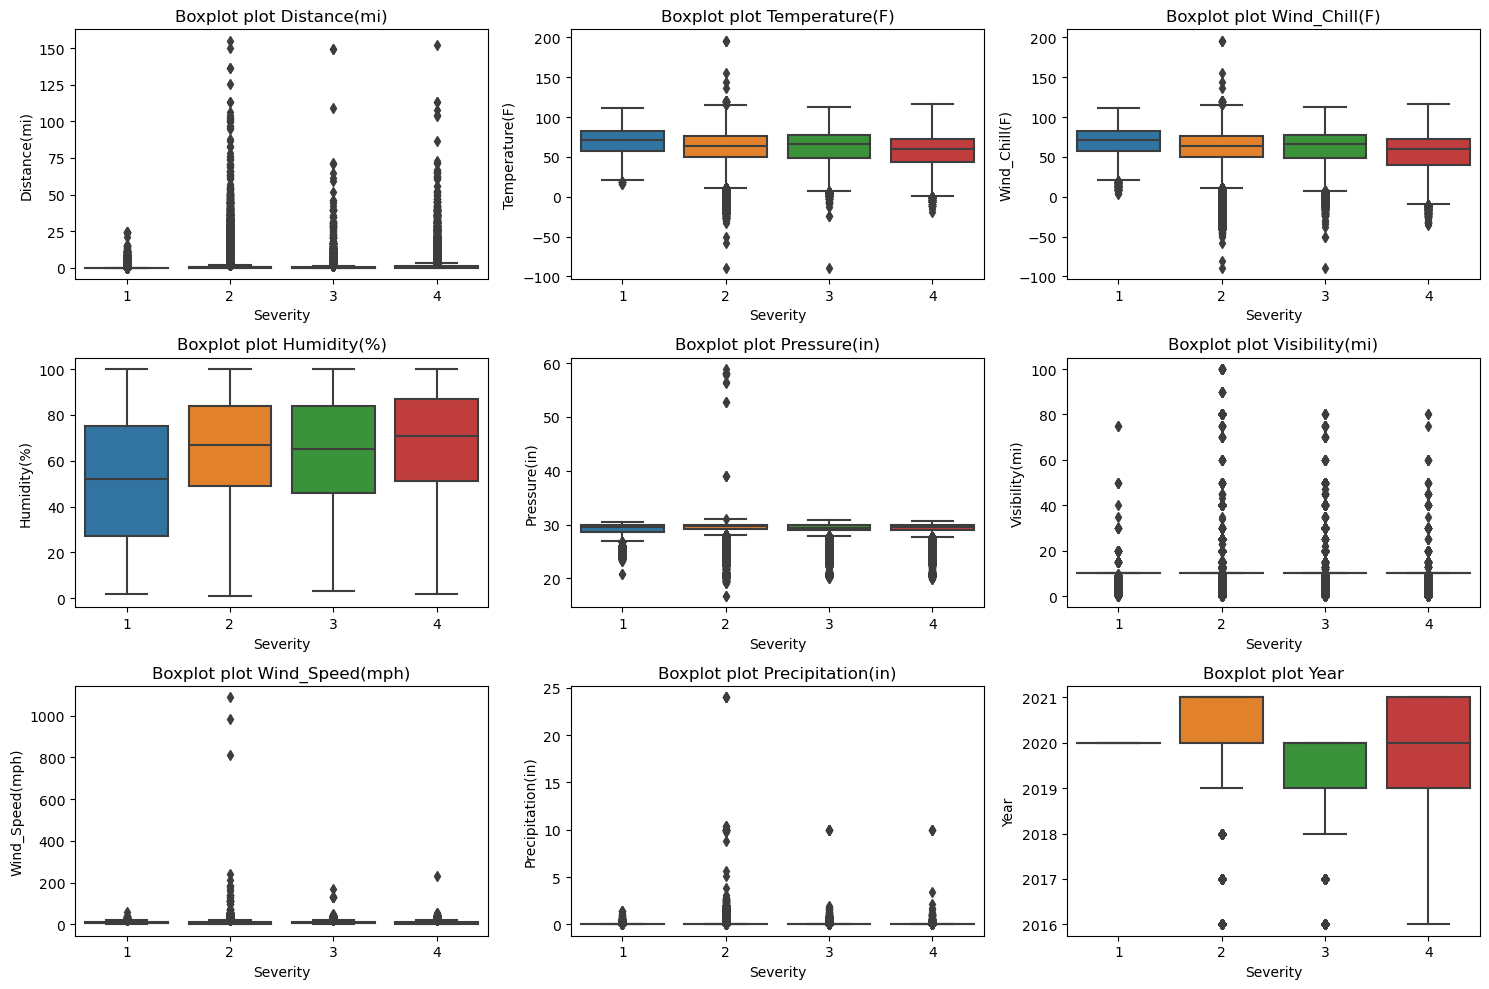

In [20]:
def BoxPLotOutlier(df):
    tmp=df.select_dtypes(include='number')
    tmp=tmp.loc[:, ~tmp.columns.isin(['Start_Lat', 'Start_Lng','End_Lat', 'End_Lng'])]
    cols=list(tmp.columns)[1:]
    
    fig, axis = plt.subplots(3,3,figsize=(15, 10))
    for ax,c in zip(axis.reshape(-1),cols):
        ax.set_title("Boxplot plot {}".format(c))
        sns.boxplot(x="Severity", y=c, data=tmp,ax=ax)
    plt.tight_layout()
    plt.show()

BoxPLotOutlier(df)

In [21]:
def Sampling(df):
    
    seed=234    
    s1 = df[df["Severity"] == 1]
    s2 = df[df["Severity"] == 2]
    s3 = df[df["Severity"] == 3]
    s4 = df[df["Severity"] == 4]

    s2_downsample = resample(s2,replace=True,n_samples=len(s1),random_state=seed)
    s3_downsample = resample(s3,replace=True,n_samples=len(s1),random_state=seed)
    s4_downsample = resample(s4,replace=True,n_samples=len(s1),random_state=seed)
    df=pd.concat([s1, s2_downsample,s3_downsample,s4_downsample]).reset_index(drop=True)
    
    return df

df=Sampling(df)
df=df.reset_index(drop=True)
df.Severity.value_counts()

1    23581
2    23581
3    23581
4    23581
Name: Severity, dtype: int64

<AxesSubplot:xlabel='Severity', ylabel='count'>

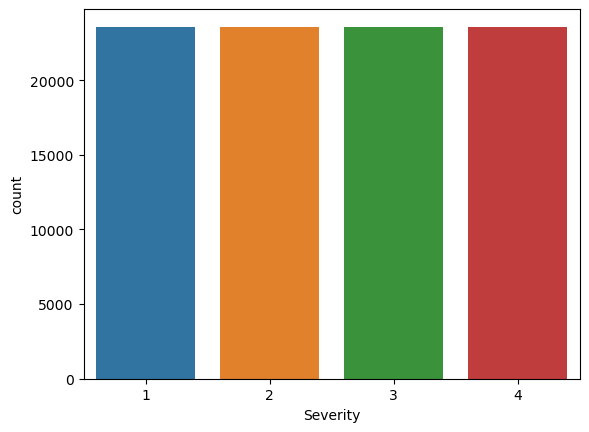

In [22]:
sns.countplot(x="Severity", data=df)

A continuacion visualizamos las variables independientes numericas contra la severidad para ver por una parte si las clases estan balanceadas respecto a las variables independientes, y por otro lado usaremos un boxplot para tomar la decision sobre que se puede considerar un valor extremo.

Para ciertas variables consideraremos outliers todo lo que se encuentra alejado 3 desviaciones estándar con respecto a la media del conjunto es un outlier.

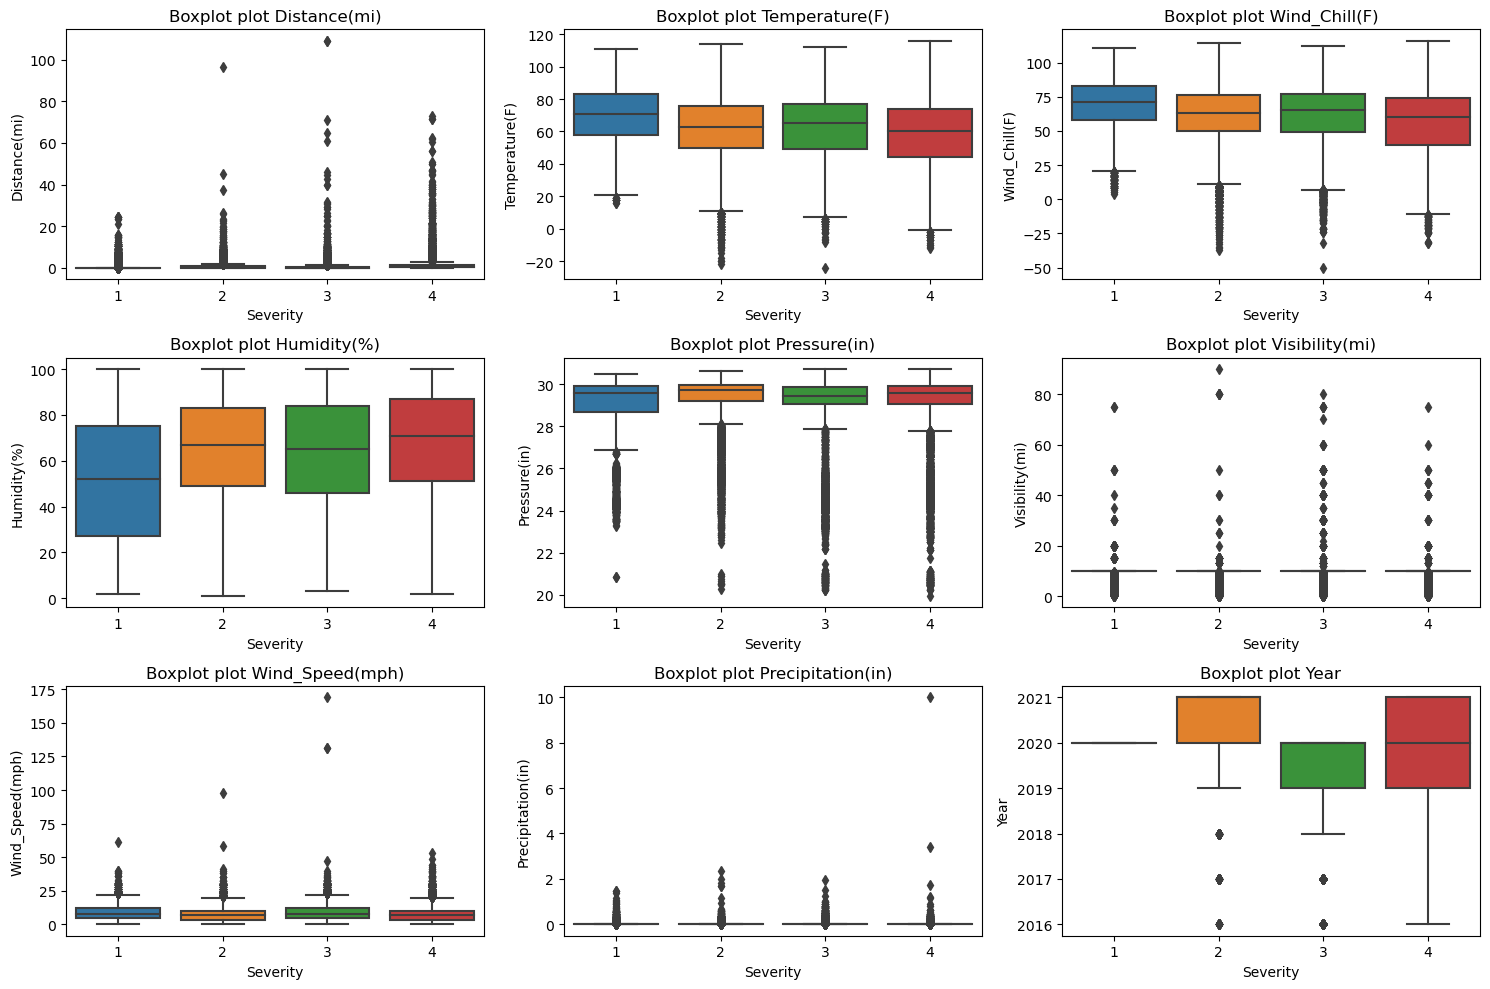

In [23]:
BoxPLotOutlier(df)

<Figure size 2000x600 with 0 Axes>

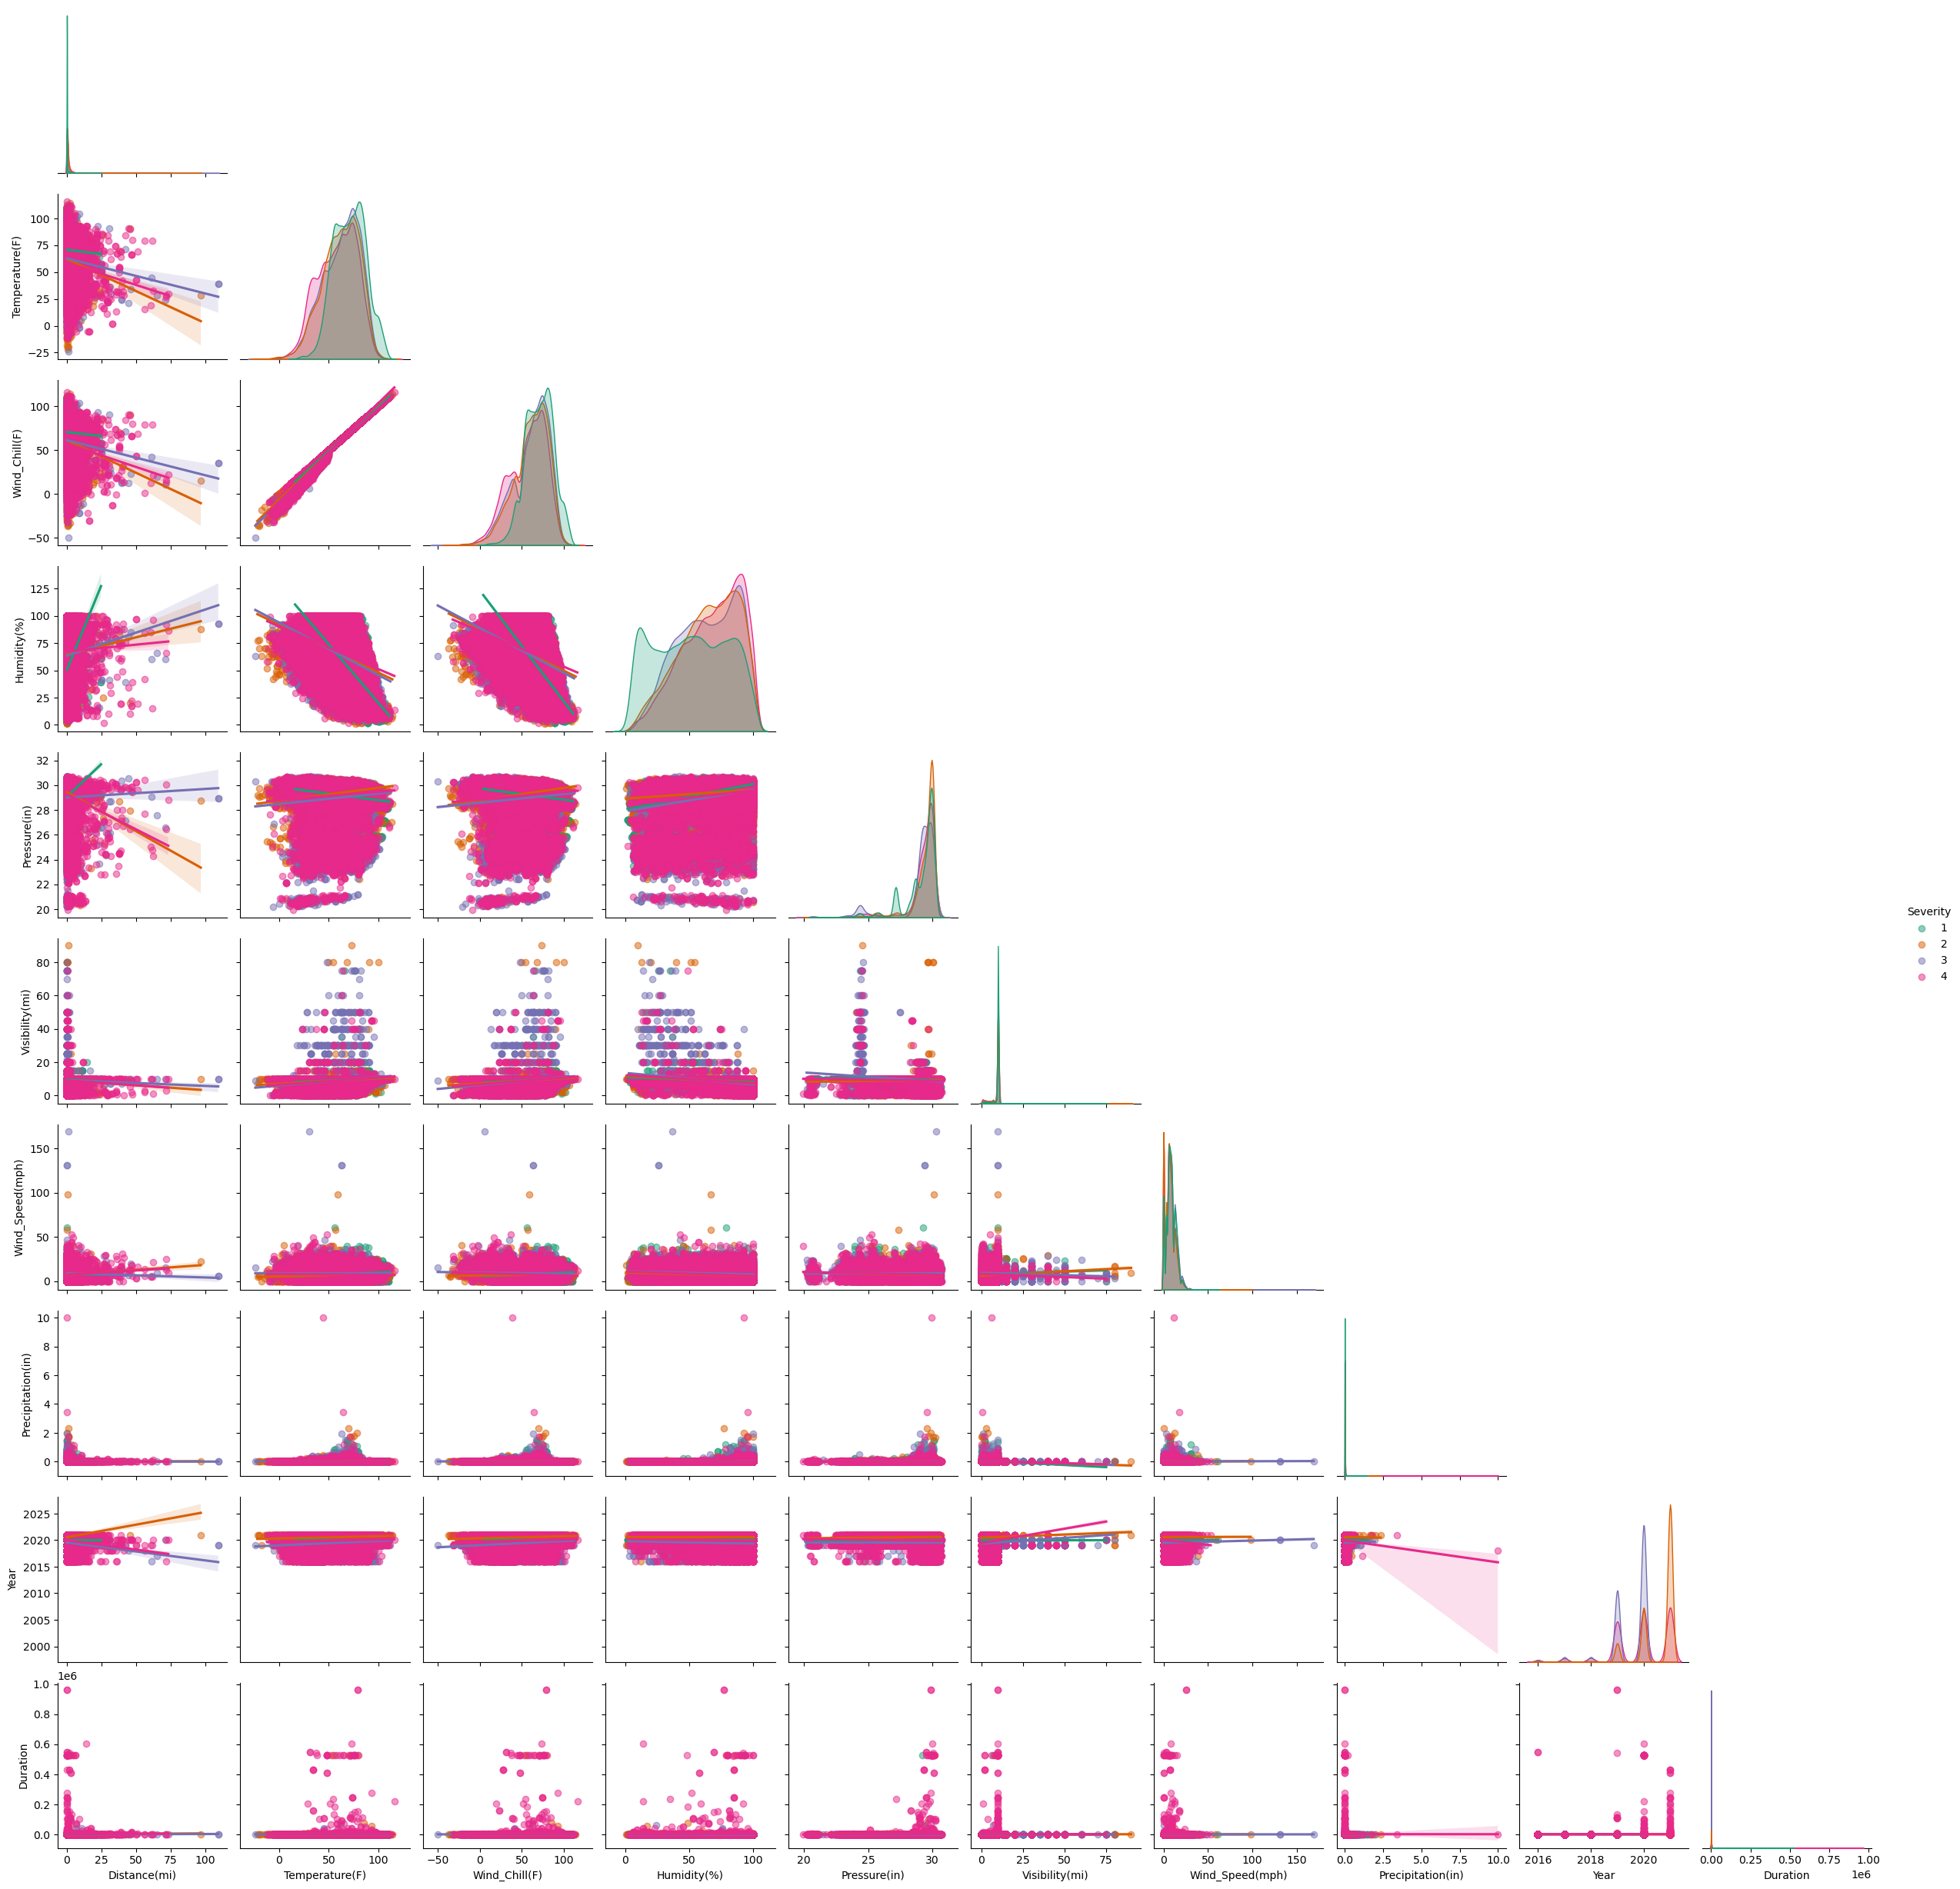

In [24]:
def PairPlot(df):
    tmp=df.select_dtypes(include='number')
    tmp['Severity']=tmp['Severity'].astype(object)
    tmp=tmp.loc[:, ~tmp.columns.isin(['Start_Lat', 'Start_Lng','End_Lat', 'End_Lng'])]
    plt.figure(figsize = (20, 6))
    sns.pairplot(tmp,hue="Severity",corner=True,kind='reg',diag_kind="kde",palette='Dark2',plot_kws={'scatter_kws': {'alpha': 0.5}})
PairPlot(df)

In [25]:
def remove_outliers(df,name):
    #Percentil
    q25,q75=np.percentile(df[name],25),np.percentile(df[name],75)
    #Interquartile range
    iqr=1.5*(q75-q25)
    #Limites
    lower,upper=q25-iqr,q75+iqr
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

df = remove_outliers(df,name='Temperature(F)')
df = remove_outliers(df,name='Wind_Chill(F)')
df = remove_outliers(df,name='Humidity(%)')
df = remove_outliers(df,name='Pressure(in)')
df = remove_outliers(df,name='Wind_Speed(mph)')

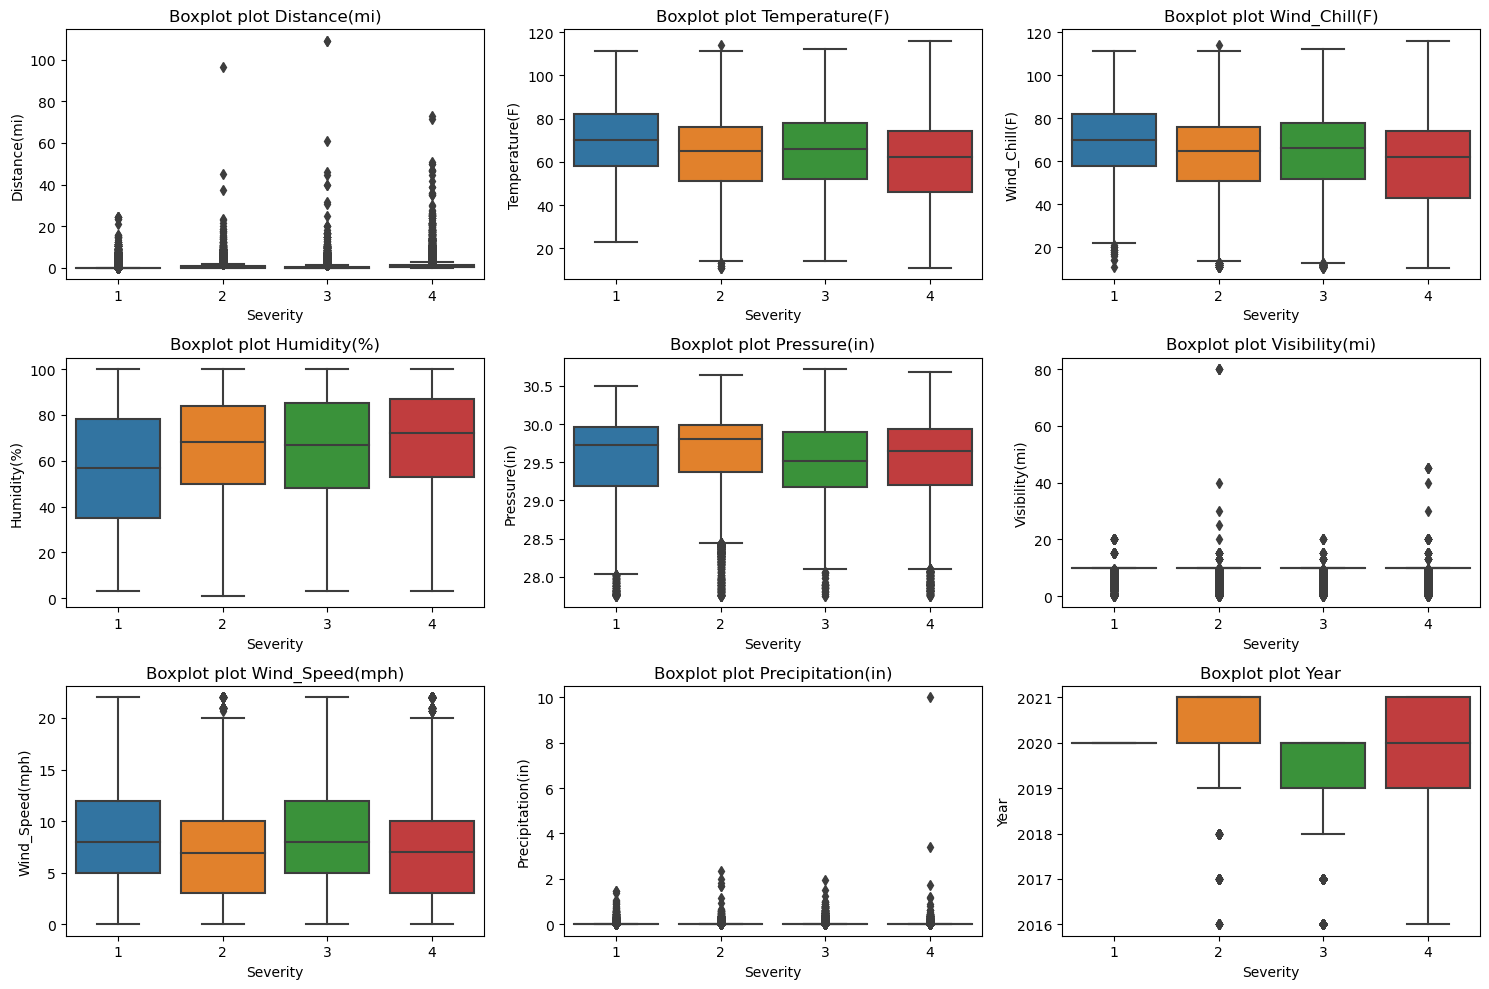

In [26]:
BoxPLotOutlier(df)

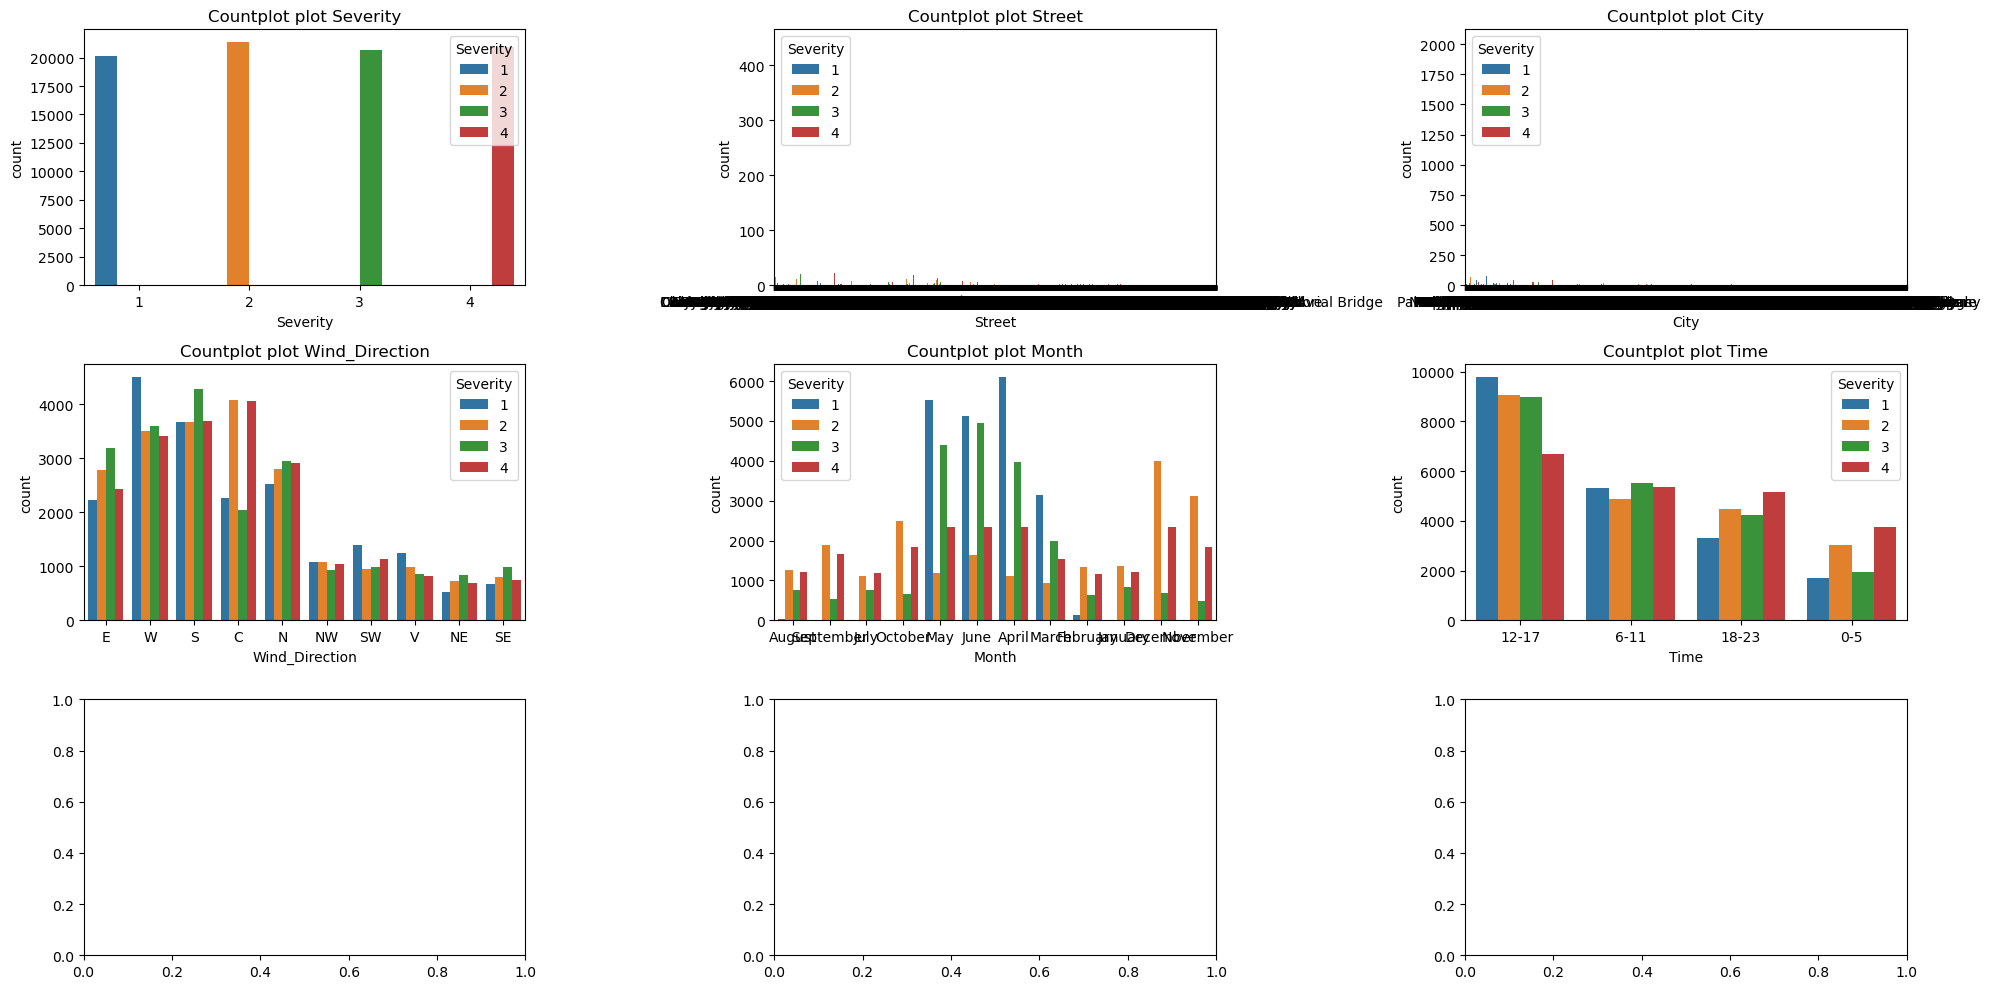

In [27]:
def CountPlotOutlier(df):
    var=["Severity",'Street', 'City', 'Wind_Direction', 'Month', 'Time']
    tmp=df.loc[:,var]
    
    fig, axis = plt.subplots(3,3,figsize=(20, 10))
    for ax,c in zip(axis.reshape(-1),var):
        ax.set_title("Countplot plot {}".format(c))
        sns.countplot(hue="Severity", x=c, data=tmp,ax=ax)
    plt.tight_layout()
    plt.show()

CountPlotOutlier(df)

Vemos que hay una gran cantidad de outliers sobre todo para  los accidentes con severidad 2. Se va a limpiar los outliers usando la desviacion estandart y luego se volvera a comparar.

In [28]:
df['Severity'] = df['Severity'].astype('category')

<div id="rúbrica" class="section level1">
<h1><span class="header-section-number">4.</span> Análisis de los datos</h1>
<hr />
</div>

<div id="ejercicio-41" class="section level2">
<h2><span class="header-section-number">4.1</span> Seleccion de Grupos</h2>
<hr />    
Selección de los grupos de datos que se quieren analizar/comparar (p.ej., si se van a comparar grupos de datos, ¿cuáles son estos grupos y qué tipo de análisis se van a aplicar?   
<hr />
</div>

Dado que en el apartado 4.3 se va realizar un analisis de agrupacion y un analisis de clasificacion, separaremos el dataset en 2 datasets distintos con las variables necesarias para el analisis correspondiente.

1. Analisis de la regresion usaremos las siguientes variables atmosfericas:

    * Distance(mi) 
    * Temperature(F)
    * Wind_Chill(F)
    * Humidity(%)
    * Pressure(in)
    * Visibility(mi)
    * Wind_Direction
    * Wind_Speed(mph)
    * Precipitation(in)
    * Weather_Condition

    Se aplicara un modelo de regresion logistica multinomial, que incluira las variables citadas como predictoras del nivel de severidad de los accidentes.


2. En el analisis del clustering nos interesa saber los puntos geograficos, para observar donde se agrupan la mayoria de accidentes de trafico. Se usan las siguientes variables:

    * Start_Lat
    * Start_Lng


<div id="ejercicio-42" class="section level2">
<h2><span class="header-section-number">4.2</span> Comprobar Normalidad</h2>
<hr />
Comprobación de la normalidad y homogeneidad de la varianza
<hr />
</div>

##### Normalidad

Como se observa el sample size es mucho mayor que 100 por lo cual hay que acudir a un test distinto del Shapiro-Wilk Test para testear la normalidad. Por lo tanto recurrimos al test de Kolmogorov–Smirnov indicado para samples grandes.

Tal como se aplica aqui la  prueba de una muestra realiza una prueba de la distribución F(x) de una variable aleatoria observada contra una distribución dada G(x) (es decir, una distribución normal).

Siendo las Hipotesis:   
* Hipotesis Nula: Distribuciones identicas F(x)=G(x) para todo x   
* Hipotesis Alternativa: Distribuciones no identicas

Para la realizacion de este test en particular hemos escogido un sample 100 para cada variable y asi porder testear la normalidad

In [29]:
def NormalTest(data,nombre,pl=1):
    statistic,p_value=stats.kstest(data,'norm',N=100,args=(np.mean(data),np.std(data,ddof=1))) 
    
    # Interpretación
    normal=False

    alpha = 0.05
    if pl==1:
        if p_value>alpha:
            #print(nombre)
            print('La muestra es Normal. No se rechaza la hipótesis nula H0')
            normal=True
        else:
            #print(nombre)
            print('La muestra no es Normal. Se rechaza la hipótesis nula H0')
            normal=False

    return statistic,p_value,normal



def sampletest(df):
    dfs = df.sample(n=100,replace=True)
    df_input=dfs.select_dtypes(include=np.number)
    s=pd.DataFrame([NormalTest(df_input[column],column,pl=0) for column in df_input],columns=["Stats","P-value","Normal"])
    s["Variable"]=[column for column in df_input]
    
    
    return s

s=sampletest(df)
s

,Stats,P-value,Normal,Variable
0,0.083707,4.604371e-01,False,Start_Lat
1,0.183916,1.965296e-03,False,Start_Lng
2,0.083589,4.622225e-01,False,End_Lat
3,0.183881,1.970525e-03,False,End_Lng
4,0.286710,9.037904e-08,False,Distance(mi)
5,0.082792,4.743975e-01,False,Temperature(F)
6,0.116084,1.246937e-01,False,Wind_Chill(F)
7,0.085095,4.396738e-01,False,Humidity(%)
8,0.087492,4.050550e-01,False,Pressure(in)
9,0.493671,5.083221e-23,False,Visibility(mi)


Observamos que ninguna de las variables del dataset es normal. Sin embargo, dado que tamaño del dataset es lo suficientemente grande (es decir,> 30), es posible asumir la normalidad de acuerdo con el Teorema del límite central.

#####  homogeneidad de la varianza

Aunque asumimos que los datos siguen una distribucion normal, por el teorema del limite central. Ya que vamos a usar un sample pequeño que no sera normal usamos el test Levene para  la comprobación de la homocedasticidad entre los grupos de la variable dependiente Severity.   

Siendo las Hipotesis:     
* Hipotesis Nula: Asume igualdad de varianzas en los diferentes grupos de datos, por lo que p-valores inferiores al nivel de significancia indicarán heterocedasticidad.  

* Hipotesis Alternativa: No asume igualdad de varianzas en los diferentes grupos de datos   


In [30]:
def TestHomocedasticidad(data,nombre):
    # Levene's Test in Python using Pingouin
    S =pg.homoscedasticity(data, dv=nombre, group='Severity',center="median")
    return S.loc["levene","W"],S.loc["levene","pval"],S.loc["levene","equal_var"]
    
    #s1=data.loc[data['Severity']==1,nombre].tolist()
    #s2=data.loc[data['Severity']==2,nombre].tolist()
    #s3=data.loc[data['Severity']==3,nombre].tolist()
    #s4=data.loc[data['Severity']==4,nombre].tolist()
    #stat, p = bartlett(s1, s2, s3,s4)
    #alpha=0.5
    #normal=False
    #if p>alpha:
    #    normal=True
    #else:
    #    normal=False
    #return stat, p, normal

def SampleHomocedasticidad(df):
    dfs = df #df.sample(n=1000,replace=True)
    var_name=[column for column in dfs.select_dtypes(include=np.number)]
    variables=var_name + ['Severity']
    df_input=dfs[variables]
    s=[TestHomocedasticidad(df_input.loc[:,['Severity',column]],column) for column in var_name]
    df_var=pd.DataFrame(s,columns=["W","P-value","equal_var"])
    #df_var=pd.DataFrame(s,columns=["stat","p","equal_var"])
    df_var["Variable"]=var_name
    
    return df_var
   
df_var=SampleHomocedasticidad(df)
df_var

,W,P-value,equal_var,Variable
0,173.911815,2.093227e-112,False,Start_Lat
1,2158.699753,0.000000e+00,False,Start_Lng
2,173.744800,2.683690e-112,False,End_Lat
3,2158.585710,0.000000e+00,False,End_Lng
4,661.911845,0.000000e+00,False,Distance(mi)
5,180.077515,2.173739e-116,False,Temperature(F)
6,317.413338,6.144525e-205,False,Wind_Chill(F)
7,559.327543,0.000000e+00,False,Humidity(%)
8,259.190867,1.918641e-167,False,Pressure(in)
9,208.548892,8.922352e-135,False,Visibility(mi)


Observamos que ninguna de las variables tiene igualdad de varianza entre los grupos de Severidad. Esto en parte se puede deber al sample size del dataset, ya que entre mas datos mayor sera la variabilidad entre los grupos.

Sin embargo, La regresión logística no hace muchas de las suposiciones clave de la regresión lineal y los modelos lineales generales que se basan en algoritmos de mínimos cuadrados ordinarios, en particular con respecto a la linealidad, la normalidad, la homocedasticidad y el nivel de medición.

Por lo tanto no aplicaremos ninguna transformacion como  cuadrada,logistica,etc sobre los datos.

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/

<div id="ejercicio-43" class="section level2">
<h2><span class="header-section-number">4.3</span> Pruebas Estadisticas</h2>
<hr />    
Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.
    
<hr />
</div>


##### Analisis de correlacion
Análisis de los factores que influyen en la severidad. Correlaciones y regresión logística multinomial.

In [31]:
# Función para normalizar dataframe
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [32]:
# Compute the correlation matrix
df_new = df[['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)', 'Weather_Condition']]

df_new.head()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
2,0.0,68.0,68.0,93.0,29.14,9.0,E,5.0,0.02,Light Rain with Thunder
3,0.0,98.0,98.0,18.0,28.28,10.0,W,5.0,0.00,Fair
4,0.0,95.0,95.0,22.0,29.90,10.0,W,9.0,0.00,Fair
5,0.0,81.0,81.0,79.0,29.20,10.0,S,7.0,0.01,Mostly Cloudy
6,0.0,71.0,71.0,81.0,27.81,10.0,C,0.0,0.00,Partly Cloudy


In [48]:
# Calculamos la matriz de correlación para las variables numéricas y las visualizamos con la librería seaborn
df_numerical = df_new[['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)']]
df_normalizado = mean_norm(df_numerical)
corr = df_normalizado.corr()

In [34]:
pd.DataFrame(corr)

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Distance(mi),1.000000,-0.053888,-0.057526,0.068994,0.001495,-0.036577,-0.014219,0.002098
Temperature(F),-0.053888,1.000000,0.994832,-0.447813,-0.097641,0.279483,0.114223,-0.031880
Wind_Chill(F),-0.057526,0.994832,1.000000,-0.432616,-0.088786,0.285641,0.071549,-0.031853
Humidity(%),0.068994,-0.447813,-0.432616,1.000000,0.207449,-0.409717,-0.195245,0.139950
Pressure(in),0.001495,-0.097641,-0.088786,0.207449,1.000000,-0.014960,-0.036661,-0.002785
Visibility(mi),-0.036577,0.279483,0.285641,-0.409717,-0.014960,1.000000,0.032860,-0.228823
Wind_Speed(mph),-0.014219,0.114223,0.071549,-0.195245,-0.036661,0.032860,1.000000,0.027097
Precipitation(in),0.002098,-0.031880,-0.031853,0.139950,-0.002785,-0.228823,0.027097,1.000000


Tras normalizar los datos y calcular los coeficientes de correlación observamos como *Temperature(F)* y *Wind_Chill(F)* están totalmente correlacionados.

A continuación comprobaré como se correlacionan las variables categóricas *weather_condition* y *wind_direction* con el resto de variables numéricas por medio del cálculo de ANOVAs.

In [35]:
def multiple_anovas(df, cat_item, num_item):
    from scipy.stats import f_oneway
    category_list = df.groupby(cat_item)[num_item].apply(list)
    anova_result = f_oneway(*category_list)
    print(f'P-value for {cat_item} and {num_item} ANOVA is {anova_result[1]}')
    if anova_result[1] < 0.05:
        print('Rejected H0, both are correlated (95%)')
    else:
        print('Acepted H0, both are not correlated (95%)')

In [36]:
print('ANOVAs for "Wind_Direction"')
multiple_anovas(df_new, 'Wind_Direction', 'Distance(mi)')
multiple_anovas(df_new, 'Wind_Direction', 'Temperature(F)')
multiple_anovas(df_new, 'Wind_Direction', 'Wind_Chill(F)')
multiple_anovas(df_new, 'Wind_Direction', 'Humidity(%)')
multiple_anovas(df_new, 'Wind_Direction', 'Pressure(in)')
multiple_anovas(df_new, 'Wind_Direction', 'Visibility(mi)')
multiple_anovas(df_new, 'Wind_Direction', 'Wind_Speed(mph)')
multiple_anovas(df_new, 'Wind_Direction', 'Precipitation(in)')
print('ANOVAs for "Weather_Condition"')
multiple_anovas(df_new, 'Weather_Condition', 'Distance(mi)')
multiple_anovas(df_new, 'Weather_Condition', 'Temperature(F)')
multiple_anovas(df_new, 'Weather_Condition', 'Wind_Chill(F)')
multiple_anovas(df_new, 'Weather_Condition', 'Humidity(%)')
multiple_anovas(df_new, 'Weather_Condition', 'Pressure(in)')
multiple_anovas(df_new, 'Weather_Condition', 'Visibility(mi)')
multiple_anovas(df_new, 'Weather_Condition', 'Wind_Speed(mph)')
multiple_anovas(df_new, 'Weather_Condition', 'Precipitation(in)')

ANOVAs for "Wind_Direction"
P-value for Wind_Direction and Distance(mi) ANOVA is 0.0009698818959663366
Rejected H0, both are correlated (95%)
P-value for Wind_Direction and Temperature(F) ANOVA is 0.0
Rejected H0, both are correlated (95%)
P-value for Wind_Direction and Wind_Chill(F) ANOVA is 0.0
Rejected H0, both are correlated (95%)
P-value for Wind_Direction and Humidity(%) ANOVA is 0.0
Rejected H0, both are correlated (95%)
P-value for Wind_Direction and Pressure(in) ANOVA is 0.0
Rejected H0, both are correlated (95%)
P-value for Wind_Direction and Visibility(mi) ANOVA is 1.3614657032668732e-275
Rejected H0, both are correlated (95%)
P-value for Wind_Direction and Wind_Speed(mph) ANOVA is 0.0
Rejected H0, both are correlated (95%)
P-value for Wind_Direction and Precipitation(in) ANOVA is 2.3853159882842742e-29
Rejected H0, both are correlated (95%)
ANOVAs for "Weather_Condition"
P-value for Weather_Condition and Distance(mi) ANOVA is 3.008245014445999e-94
Rejected H0, both are corr

Correlación entre variables categóricas (V de Cramer)

In [37]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.to_numpy().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [38]:
confusion_matrix = pd.crosstab(df['Weather_Condition'], df['Wind_Direction'])
cramers_v(confusion_matrix)

0.09187909776290026

Este valor cercano a 0 nos indica la poca correlación entre ambas variables categóricas.

##### Analisis de Regresion

Aplicaré una regresión logística multinomial para comprobar como se relacionan estas variables con la severidad del accidente. Para las variables altamente correlacionadas puede omitirse una de ellas. Para aplicar correctamente regresiones logísticas e interpretarlas se ha seguido lo descrito en el siguiente enlace: https://www.datasklr.com/logistic-regression/multinomial-logistic-regression

In [39]:
# Elimino la columna Wind_Chill al estar altamente correlacionada con Temperature
X = df_normalizado[['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)']]
y = df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [40]:
logit_model = sm.MNLogit(y_train, sm.add_constant(X_train))
logit_model
result = logit_model.fit()
stats = result.summary()

Optimization terminated successfully.
         Current function value: 1.311815
         Iterations 7


Se coge como clase base la severidad nivel 1. A partir de esta se crean tres conjuntos de coeficientes para evaluar e interpretar las *odds* de que la severidad sea la clase base o la que se compara con esta. Cada coeficiente se corresponde con las variables introducidas en el modelo. En el primer caso (Severity = 0), aunque algo confuso, se está comparando la severidad de nivel 1 con la de nivel 2. La distancia en millas tiene un p-valor inferior a 0.05 por lo que es significativo a la hora de predecir la severidad del accidente. Además, tiene un coeficiente de 1.18 en este caso y esto implica que por cada milla que aumente la distancia el accidente es 1.18 veces más posible que el accidente sea de severidad 2.

##### Analisis de agrupacion

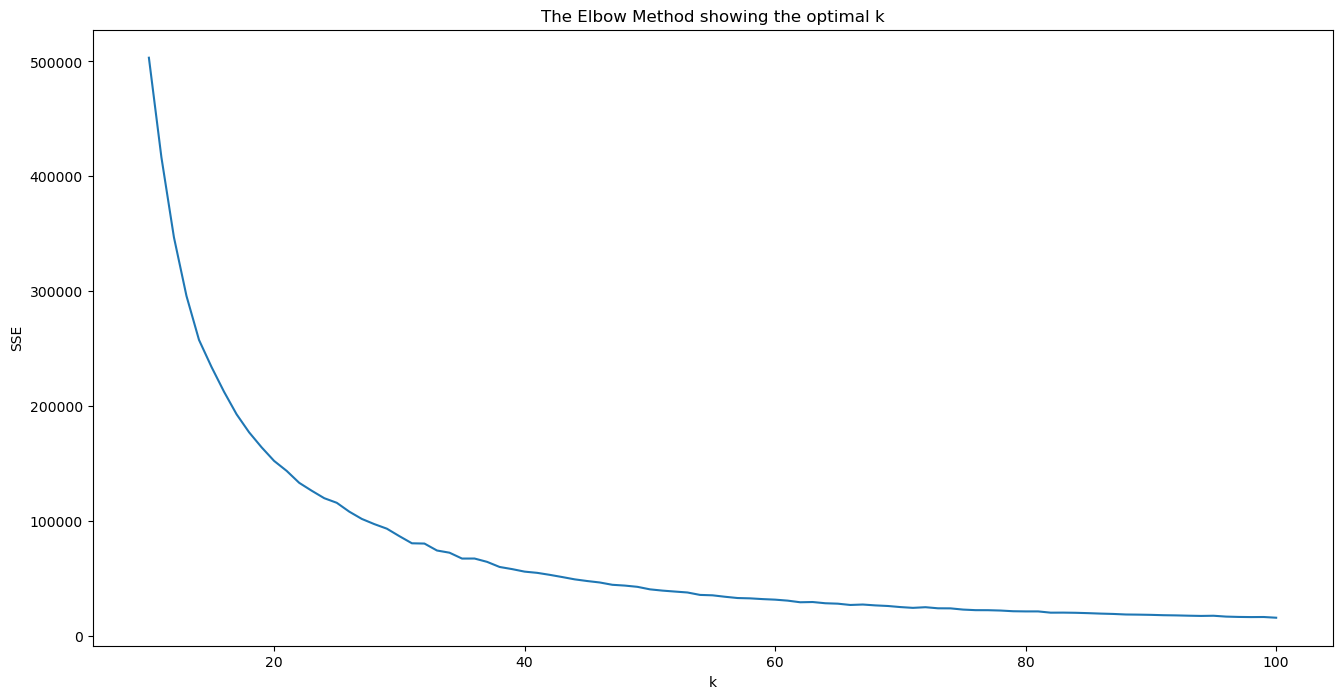

In [41]:
def kmeans_elbow_function(data, kmin, kmax):
    y = []
    for n in range(kmin, kmax+1):
        model = cluster.KMeans(n_clusters=n)
        # Obtengo un array con las distancias de cada elemento a cada cluster
        dists = model.fit_transform(data)
        # Sumo las distancias mínimas de cada elemento. Obtengo un array con la suma
        # de las distancias mínimas al cuadrado (clúster asignado)
        y.append(np.sum(np.min(dists, axis=1) ** 2))
    plt.figure(figsize=(16, 8))
    plt.plot(range(kmin, kmax+1), y)
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method showing the optimal k')
    return plt

plot2 = kmeans_elbow_function(df[['Start_Lat', 'Start_Lng']], 10, 100)
plot2.show()

In [46]:
#Model
k = 50
model = cluster.KMeans(n_clusters=k, init='k-means++')
# Select variables
X = df.loc[:,["Start_Lng","Start_Lat"]]

# clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)

<div id="ejercicio-5" class="section level1">
<h1><span class="header-section-number">5.</span> Representación de los resultados</h1>
<hr />
</div>

###### Correlacion Visualizacion

<AxesSubplot:>

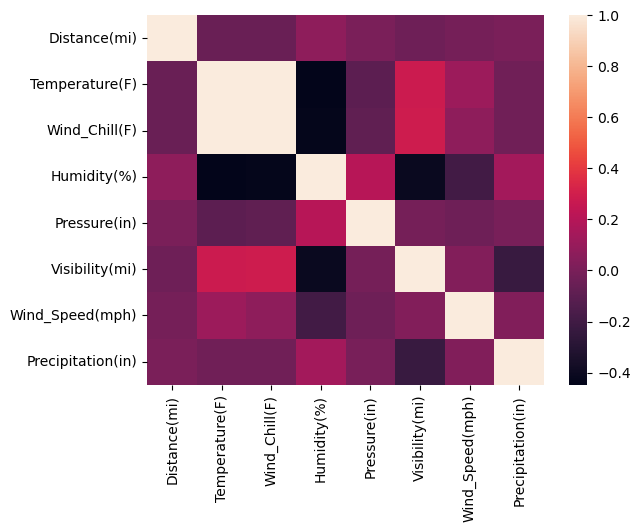

In [43]:
sns.heatmap(corr)

##### multinomial Regression visualizacion

In [44]:
print(stats)

                          MNLogit Regression Results                          
Dep. Variable:               Severity   No. Observations:                66498
Model:                        MNLogit   Df Residuals:                    66474
Method:                           MLE   Df Model:                           21
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                 0.05358
Time:                        22:11:39   Log-Likelihood:                -87233.
converged:                       True   LL-Null:                       -92171.
Covariance Type:            nonrobust   LLR p-value:                     0.000
       Severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2800      0.013     20.816      0.000       0.254       0.306
Distance(mi)          1.1800      0.033     35.233      0.000       1.114       1.246
Temperature(F)       -0.

##### Cluster visualizacion

In [54]:
#Get cluster size
count=dtf_X.groupby(["cluster"]).count().reset_index()
si=count["Start_Lat"].apply(lambda x: (10000*x)/count["Start_Lat"].sum()).tolist()

#plot
si=count["Start_Lat"].apply(lambda x: (1000*x)/count["Start_Lat"].sum()).tolist()
fig = go.Figure(data=go.Scattergeo(
        lon = model.cluster_centers_[:,0],
        lat = model.cluster_centers_[:,1],
        mode = 'markers',
        marker= {"size":si}
        ))

fig.update_layout(
        title = 'US accident focus',
        geo_scope='usa',
    )


fig.show()

<div id="ejercicio-6" class="section level1">
<h1><span class="header-section-number">6.</span> Resolución del problema</h1>
<hr />
A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?
<hr />
</div>

1. Resultados de las correlaciones

    * Tras el análisis observamos que estan altamente correlacionados la temperatura (Temperature(F)) y la sensacion térmica influida por el viento (Wind_Chill(F)). Por lo cual para la futura prediccion de la severidad de los accidentes podemos omitir una de ellas como variable independiente/predictor.
    
    * Por otro lado, las variables de direccion del viento ('Wind_Direction') y la percepcion general del tiempo ('Weather_Condition') estan correlacionadas con todas las variables meteorologicas ya que el conjunto de variables da una percepcion/clasificacion general del tiempo.


2. Resultados de las regresiones

    * Se observa, en la regresion, para los factores de severidad 1 & severidad 2 de la variable dependiente (Severidad) que el predictor visibilidad no es significativo. 
    * Ademas los factores distancia, humedad y presion tienen un efecto positivo en la probabilidad de ocurrencia del factor de severidad 2, mientras que las variables independientes como Temperatura, velocidad del viento y precipitacion tienen un efecto inverso en la ocurrencia de este factor. 
    * Para la comparativa entre el factor de severidad 1 & 3, no resulta significativa la variable precipitacion, y son las variables distancias y humedad las que presentan un efecto positivo, mientras que el resto presentan un efecto negativo.
    * En el caso de los niveles de severidad de 1 y 4, todas las variables son significativas. Presentando un efecto positivo la distancia, la humedad y la visibilidad; siendo el resto de predictores negativos.

3. Resultados del clustering

   * Se observa que el numero optimo de cluster se encuentra entorno a 40-60 grupos. Esto tiene cierta similitud con el numero de estados que conforman EEUU, por lo tanto el numero de agrupacion elegido sera 50.
   * Se observa una mayor concentracion de accidentes en las carreteras correspondientes a estados que lindan con la costa. Por ejemplo Florida y California

